<a href="https://colab.research.google.com/github/srace11/Financial_Spending/blob/main/3120FinalReportForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3120 Final Report: Forecasting
## Team 3: Financial Spending Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Holt Double Exponential Linear
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

In [ ]:
df = pd.read_csv('josh-transaction.csv')
df.head() # view the data

,Unnamed: 0,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,date,...,mask,name_y,official_name,subtype,type,balances.available,balances.current,balances.iso_currency_code,balances.limit,balances.unofficial_currency_code
0,0,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,-1427.69,NaN,NaN,"['Payment', 'Credit Card']",16001000,NaN,2022-05-05,...,2633,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN
1,1,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,101.17,NaN,NaN,"['Recreation', 'Arts and Entertainment']",17001000,NaN,2022-05-04,...,2633,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN
2,2,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,47.52,NaN,NaN,"['Shops', 'Food and Beverage Store']",19025000,NaN,2022-05-04,...,2633,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN
3,3,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,259.50,NaN,NaN,"['Healthcare', 'Healthcare Services', 'Mental ...",14001008,NaN,2022-05-04,...,2633,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN
4,4,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,23.76,NaN,NaN,"['Food and Drink', 'Restaurants']",13005000,NaN,2022-05-04,...,2633,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN


In [ ]:
df['datetime_calc']  = pd.to_datetime(df.date)

In [ ]:
df.category.unique()

array(["['Payment', 'Credit Card']",
       "['Recreation', 'Arts and Entertainment']",
       "['Shops', 'Food and Beverage Store']",
       "['Healthcare', 'Healthcare Services', 'Mental Health']",
       "['Food and Drink', 'Restaurants']", "['Service', 'Subscription']",
       "['Shops', 'Supermarkets and Groceries']",
       "['Healthcare', 'Healthcare Services']", "['Transfer', 'Debit']",
       "['Shops', 'Bookstores']", "['Shops', 'Digital Purchase']",
       "['Shops', 'Computers and Electronics', 'Video Games']",
       "['Interest', 'Interest Charged']", "['Travel', 'Rail']",
       "['Service', 'Food and Beverage']",
       "['Transfer', 'Third Party', 'PayPal']",
       "['Travel', 'Public Transportation Services']",
       "['Transfer', 'Payroll']", "['Food and Drink']",
       "['Travel', 'Gas Stations']",
       "['Travel', 'Car and Truck Rentals']", "['Service', 'Insurance']",
       "['Service', 'Security and Safety']",
       "['Travel', 'Airlines and Aviation Servic

In [ ]:
only_stores = [('Transfer' in x) for x in df['category']]
df[only_stores]

,Unnamed: 0,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,date,...,name_y,official_name,subtype,type,balances.available,balances.current,balances.iso_currency_code,balances.limit,balances.unofficial_currency_code,datetime_calc
11,11,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,26.37,NaN,NaN,"['Transfer', 'Debit']",21006000,NaN,2022-05-02,...,Choice Rewards World MC,NaN,credit card,credit,9718.00,0.00,USD,9718.0,NaN,2022-05-02
12,12,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,35.61,NaN,NaN,"['Transfer', 'Debit']",21006000,NaN,2022-05-02,...,Choice Rewards World MC,NaN,credit card,credit,9718.00,0.00,USD,9718.0,NaN,2022-05-02
13,13,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,32.28,NaN,NaN,"['Transfer', 'Debit']",21006000,NaN,2022-04-30,...,Choice Rewards World MC,NaN,credit card,credit,9718.00,0.00,USD,9718.0,NaN,2022-04-30
14,14,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,38.69,NaN,NaN,"['Transfer', 'Debit']",21006000,NaN,2022-04-28,...,Choice Rewards World MC,NaN,credit card,credit,9718.00,0.00,USD,9718.0,NaN,2022-04-28
18,18,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,35.45,NaN,NaN,"['Transfer', 'Debit']",21006000,NaN,2022-04-25,...,Choice Rewards World MC,NaN,credit card,credit,9718.00,0.00,USD,9718.0,NaN,2022-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1127,X1p8M4k6kDFAR0dz6zDouVLDykOXKPtkBavYL,NaN,90.00,NaN,NaN,"['Transfer', 'Withdrawal']",21012000,NaN,2020-05-28,...,Joshua's savings,NaN,savings,depository,397.65,402.65,USD,NaN,NaN,2020-05-28
1129,1129,X1p8M4k6kDFAR0dz6zDouVLDykOXKPtkBavYL,NaN,100.00,NaN,NaN,"['Transfer', 'Withdrawal']",21012000,NaN,2020-04-30,...,Joshua's savings,NaN,savings,depository,397.65,402.65,USD,NaN,NaN,2020-04-30
1130,1130,X1p8M4k6kDFAR0dz6zDouVLDykOXKPtkBavYL,NaN,-186.41,NaN,NaN,"['Transfer', 'Deposit']",21007000,NaN,2020-04-02,...,Joshua's savings,NaN,savings,depository,397.65,402.65,USD,NaN,NaN,2020-04-02
1132,1132,X1p8M4k6kDFAR0dz6zDouVLDykOXKPtkBavYL,NaN,250.00,NaN,NaN,"['Transfer', 'Withdrawal']",21012000,NaN,2020-03-16,...,Joshua's savings,NaN,savings,depository,397.65,402.65,USD,NaN,NaN,2020-03-16


In [ ]:
no_transfer_payment_mask = [('Transfer' not in x) and ('Payment' not in x) for x in df['category']]
df_clean = df[no_transfer_payment_mask]

In [ ]:
df_filt = df_clean[df_clean['subtype']=='credit card']
df_filt

,Unnamed: 0,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,date,...,name_y,official_name,subtype,type,balances.available,balances.current,balances.iso_currency_code,balances.limit,balances.unofficial_currency_code,datetime_calc
1,1,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,101.17,NaN,NaN,"['Recreation', 'Arts and Entertainment']",17001000,NaN,2022-05-04,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2022-05-04
2,2,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,47.52,NaN,NaN,"['Shops', 'Food and Beverage Store']",19025000,NaN,2022-05-04,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2022-05-04
3,3,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,259.50,NaN,NaN,"['Healthcare', 'Healthcare Services', 'Mental ...",14001008,NaN,2022-05-04,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2022-05-04
4,4,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,23.76,NaN,NaN,"['Food and Drink', 'Restaurants']",13005000,NaN,2022-05-04,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2022-05-04
5,5,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,9.29,NaN,NaN,"['Food and Drink', 'Restaurants']",13005000,NaN,2022-05-03,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2022-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,-5.00,NaN,NaN,"['Travel', 'Airlines and Aviation Services']",22001000,NaN,2020-03-16,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2020-03-16
440,440,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,305.20,NaN,NaN,"['Travel', 'Airlines and Aviation Services']",22001000,NaN,2020-03-15,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2020-03-15
441,441,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,7.73,NaN,NaN,"['Food and Drink', 'Restaurants']",13005000,NaN,2020-03-09,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2020-03-09
442,442,NEpJQBZjZgiXOjEp0p1ZI4V0dbwDBnU0BLNm6,NaN,7.57,NaN,NaN,"['Food and Drink', 'Restaurants']",13005000,NaN,2020-03-09,...,Choice Rewards World MC,NaN,credit card,credit,9718.0,0.0,USD,9718.0,NaN,2020-03-09


In [ ]:
date_amount = df_filt[['amount','date']].groupby(['date']).sum()
date_amount.head()

,amount
date,
2020-03-08,140.06
2020-03-09,15.30
2020-03-15,305.20
2020-03-16,-5.00
2020-03-18,0.00


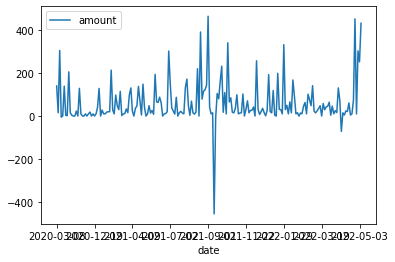

In [ ]:
date_amount.plot()

In [ ]:
#df.groupby('Name').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
weekly_amount = df_filt[['datetime_calc', 'amount']].resample('W-Mon', on='datetime_calc').sum().reset_index()
weekly_amount

,datetime_calc,amount
0,2020-03-09,155.36
1,2020-03-16,300.20
2,2020-03-23,139.20
3,2020-03-30,0.00
4,2020-04-06,0.00
...,...,...
109,2022-04-11,150.95
110,2022-04-18,106.16
111,2022-04-25,541.27
112,2022-05-02,313.42


In [ ]:
df_cc = df[df['subtype']=='credit card']
weekly_count_expens = df_cc.resample('W-Mon', on='datetime_calc').count()['amount'].rename('total_trans_count').reset_index()
weekly_count_expens = weekly_count_expens.set_index('datetime_calc')
weekly_count_expens

,total_trans_count
datetime_calc,
2020-03-09,5
2020-03-16,3
2020-03-23,4
2020-03-30,0
2020-04-06,0
...,...
2022-04-11,7
2022-04-18,13
2022-04-25,11


In [ ]:
weekly_count_fit = ExponentialSmoothing(weekly_count_expens, trend="add", seasonal="add", seasonal_periods=4).fit()
weekly_count_fore = weekly_count_fit.forecast(12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


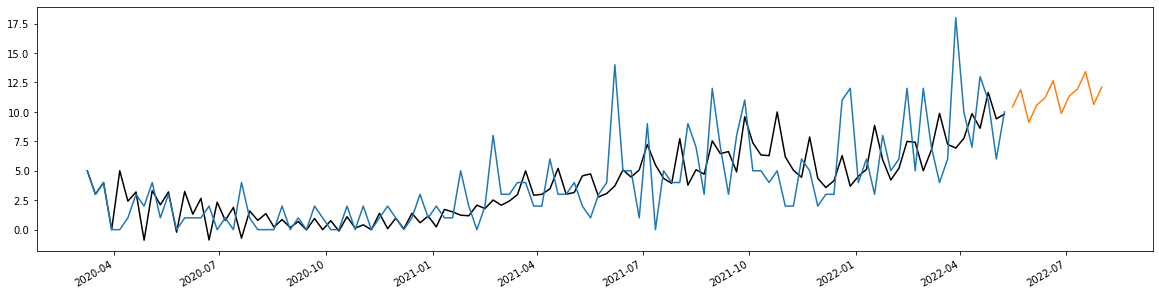

In [ ]:
#plot with forcast
plt.figure(figsize=(20,5))
plt.plot(weekly_count_expens.index, weekly_count_fit.fittedvalues, color="black")
plt.plot(weekly_count_expens.index, weekly_count_expens['total_trans_count'])
weekly_count_fore.plot()

In [ ]:
tt_wc = weekly_count_expens
df_train_wc = tt_wc[(tt_wc.index	 < '2022-01-01')]
df_test_wc = tt_wc[(tt_wc.index	 >= '2022-01-01')]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


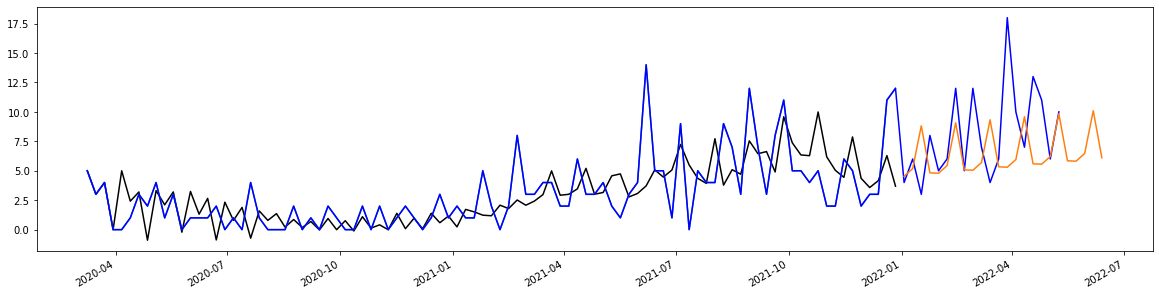

In [ ]:
fit2= ExponentialSmoothing(df_train_wc, trend="add", seasonal="add", seasonal_periods=4).fit()
fore2 = fit2.forecast(24)
plt.figure(figsize=(20,5))
plt.plot(df_train_wc.index, fit2.fittedvalues, color="black")
plt.plot(df_train_wc.index, df_train_wc['total_trans_count'])
plt.plot(weekly_count_expens.index, weekly_count_expens['total_trans_count'], color='blue')
fore2.plot()

## Daily exponential smoothing

In [ ]:
df_1 = date_amount.rename(columns={'date':'amount'}).reset_index()
df_1.head()

,date,amount
0,2020-03-08,140.06
1,2020-03-09,15.30
2,2020-03-15,305.20
3,2020-03-16,-5.00
4,2020-03-18,0.00


Plot w/ credit card filter:

Before splitting into test & train:

In [ ]:
fit = ExponentialSmoothing(date_amount, trend="add", seasonal="add", seasonal_periods=30).fit()
fore = fit.forecast(12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


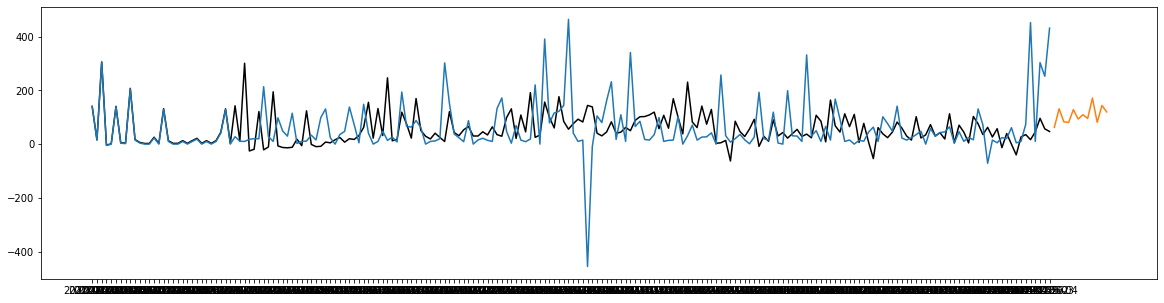

In [ ]:
#plot with forcast
plt.figure(figsize=(20,5))
plt.plot(date_amount.index, fit.fittedvalues, color="black")
plt.plot(date_amount.index, df_1['amount'])
fore.plot()

In [ ]:
df_train = df_1[(df_1.date < '2022-01-01')]
df_test = df_1[(df_1.date >= '2022-01-01')]
df_train.tail()

,date,amount
134,2021-12-23,7.49
135,2021-12-24,20.39
136,2021-12-25,36.00
137,2021-12-27,16.19
138,2021-12-31,1.08


In [ ]:
da_train = date_amount[date_amount.index < '2022-01-01']
da_test = date_amount[date_amount.index >= '2022-01-01']
da_train.tail()

,amount
date,
2021-12-23,7.49
2021-12-24,20.39
2021-12-25,36.00
2021-12-27,16.19
2021-12-31,1.08


In [ ]:
da_test.head()

,amount
date,
2022-01-03,26.49
2022-01-04,193.00
2022-01-07,20.68
2022-01-10,14.95
2022-01-13,119.00


In [ ]:
fit2= ExponentialSmoothing(da_train, trend="add", seasonal="add", seasonal_periods=24).fit()
fore2 = fit2.forecast(54)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


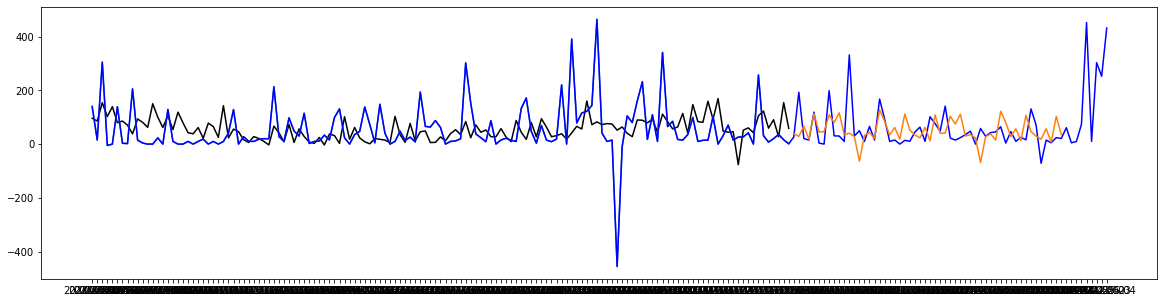

In [ ]:
#plot with forcast
plt.figure(figsize=(20,5))
plt.plot(da_train.index, fit2.fittedvalues, color="black")
plt.plot(da_train.index, df_train['amount'])
plt.plot(date_amount.index, df_1['amount'], color = "blue")
fore2.plot()

Group by week: